# Clustering

Clustering is the assignment of a set of observations into subsets (called clusters) so that observations in the same cluster are similar in some sense. Clustering is a method of unsupervised learning, and a common technique for statistical data analysis used in many fields.

Hierarchical algorithms find successive clusters using previously established clusters. These algorithms usually are either agglomerative ("bottom-up") or divisive ("top-down"). Agglomerative algorithms begin with each element as a separate cluster and merge them into successively larger clusters. Divisive algorithms begin with the whole set and proceed to divide it into successively smaller clusters.

Partitional algorithms typically determine all clusters at once, but can also be used as divisive algorithms in the hierarchical clustering. Many partitional clustering algorithms require the specification of the number of clusters to produce in the input data set, prior to execution of the algorithm. Barring knowledge of the proper value beforehand, the appropriate value must be determined, a problem on its own for which a number of techniques have been developed.

Density-based clustering algorithms are devised to discover arbitrary-shaped clusters. In this approach, a cluster is regarded as a region in which the density of data objects exceeds a threshold.

Subspace clustering methods look for clusters that can only be seen in a particular projection (subspace, manifold) of the data. These methods thus can ignore irrelevant attributes. The general problem is also known as Correlation clustering while the special case of axis-parallel subspaces is also known as two-way clustering, co-clustering or biclustering in bioinformatics: in these methods not only the objects are clustered but also the features of the objects, i.e., if the data is represented in a data matrix, the rows and columns are clustered simultaneously. They usually do not however work with arbitrary feature combinations as in general subspace methods.

In [ ]:
import $ivy.`com.github.haifengl::smile-scala:2.2.2`
import $ivy.`org.slf4j:slf4j-simple:1.7.30`  

import scala.language.postfixOps
import smile._
import smile.math._
import smile.math.distance._
import smile.math.kernel._
import smile.math.matrix._
import smile.math.matrix.Matrix._
import smile.math.rbf._
import smile.stat.distribution._
import smile.data._
import smile.data.formula._
import smile.data.measure._
import smile.data.`type`._
import smile.clustering._

import java.awt.Color.{BLACK, BLUE, CYAN, DARK_GRAY, GRAY, GREEN, LIGHT_GRAY, MAGENTA, ORANGE, PINK, RED, WHITE, YELLOW}
import smile.plot.swing.Palette.{DARK_RED, VIOLET_RED, DARK_GREEN, LIGHT_GREEN, PASTEL_GREEN, FOREST_GREEN, GRASS_GREEN, NAVY_BLUE, SLATE_BLUE, ROYAL_BLUE, CADET_BLUE, MIDNIGHT_BLUE, SKY_BLUE, STEEL_BLUE, DARK_BLUE, DARK_MAGENTA, DARK_CYAN, PURPLE, LIGHT_PURPLE, DARK_PURPLE, GOLD, BROWN, SALMON, TURQUOISE, BURGUNDY, PLUM}
import smile.plot.swing._
import smile.plot.show

System.setProperty("java.awt.headless", "true")
implicit def render(canvas: javax.swing.JComponent): Unit = {
  publish.html(smile.plot.swing.img(canvas))
}

## Hierarchical Clustering

Agglomerative hierarchical clustering seeks to build a hierarchy of clusters in a bottom up approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. The results of hierarchical clustering are usually presented in a dendrogram.

In general, the merges are determined in a greedy manner. In order to decide which clusters should be combined, a measure of dissimilarity between sets of observations is required. In most methods of hierarchical clustering, this is achieved by use of an appropriate metric, and a linkage criteria which specifies the dissimilarity of sets as a function of the pairwise distances of observations in the sets.

Hierarchical clustering has the distinct advantage that any valid measure of distance can be used. In fact, the observations themselves are not required: all that is used is a matrix of distances.

[scala-interpreter-1] INFO smile.util.package$ - Hierarchical clustering runtime: 0:00:00.122870



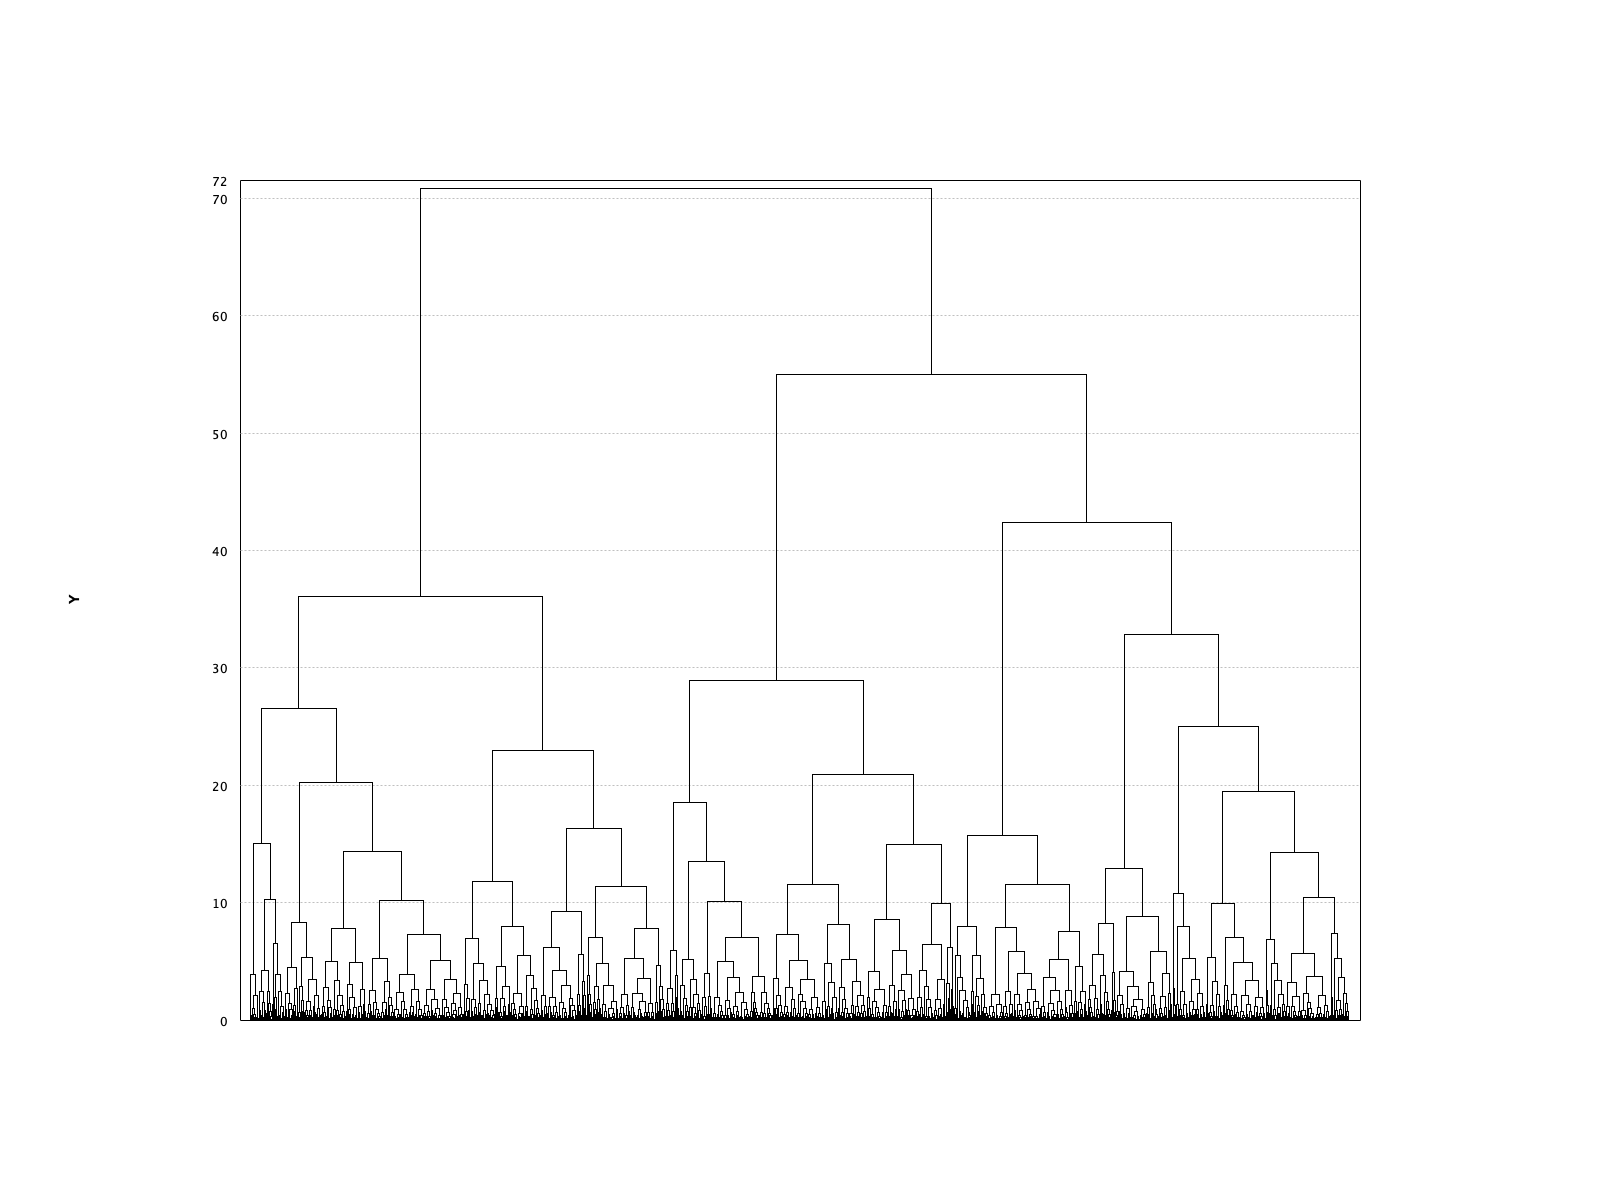

x: Array[Array[Double]] = Array(
  Array(0.216754862863576, -2.83958305795995),
  Array(-0.542492572263425, 1.51146905596993),
  Array(0.891144645072327, 1.44235456512301),
  Array(0.595980577187474, 0.505369283646191),
  Array(1.63561800111297, -0.757293249410894),
  Array(0.689275441919723, 0.249238084707463),
  Array(-1.28124663010116, -0.316852595609554),
  Array(-0.213144519278363, 0.102921344748016),
  Array(1.89653987190927, -0.211608601246304),
  Array(1.77686321368272, 0.270543080449676),
  Array(0.566604498180317, -0.3070002549446),
  Array(0.01571945400457, 0.889868717770363),
  Array(0.383057338517151, 0.388043478406846),
  Array(-0.0451371159133086, -2.27438816241481),
  Array(0.0343519073969926, -0.549951687927403),
  Array(0.169026774218306, 0.33038001858613),
  Array(1.16502683902767, -0.598144633673371),
  Array(-0.0442039972520874, -1.26204425536808),
  Array(-0.100368442585905, 0.763298406393644),
  Array(-0.283444568873591, 0.840964638968194),
  Array(1.540814980870

In [2]:
val x = read.csv("data/clustering/gaussian/six.txt", header = false, delimiter = ' ').toArray
val clusters = hclust(x, "complete")
show(dendrogram(clusters))

## K-Means

K-Means clustering partitions n observations into k clusters in which each observation belongs to the cluster with the nearest mean. Although finding an exact solution to the K-Means problem for arbitrary input is NP-hard, the standard approach to finding an approximate solution (often called Lloyd's algorithm or the K-Means algorithm) is used widely and frequently finds reasonable solutions quickly.

K-Means is a hard clustering method, i.e. each sample is assigned to a specific cluster. In contrast, soft clustering, e.g. the Expectation-Maximization algorithm for Gaussian mixtures, assign samples to different clusters with different probabilities.

The K-Means algorithm has at least two major theoretic shortcomings:

First, it has been shown that the worst case running time of the algorithm is super-polynomial in the input size.
Second, the approximation found can be arbitrarily bad with respect to the objective function compared to the optimal learn.
In Smile, we use K-Means++ which addresses the second of these obstacles by specifying a procedure to initialize the cluster centers before proceeding with the standard K-Means optimization iterations. With the K-Means++ initialization, the algorithm is guaranteed to find a solution that is `O(log k)` competitive to the optimal K-Means solution.

We also use K-D trees to speed up each K-Means step as described in the filter algorithm by Kanungo, et al.

[scala-interpreter-1] INFO smile.math.MathEx - Set RNG seed 19650218 for thread scala-interpreter-1
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after initialization: 7710.0246
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   1 iterations: 5269.8132
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   2 iterations: 5208.9678
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   3 iterations: 5183.6102
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   4 iterations: 5173.1820
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   5 iterations: 5167.8733
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   6 iterations: 5163.1340
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   7 iterations: 5161.2503
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   8 iterations: 5159.2741
[scala-interpreter-1] INFO smile.clu


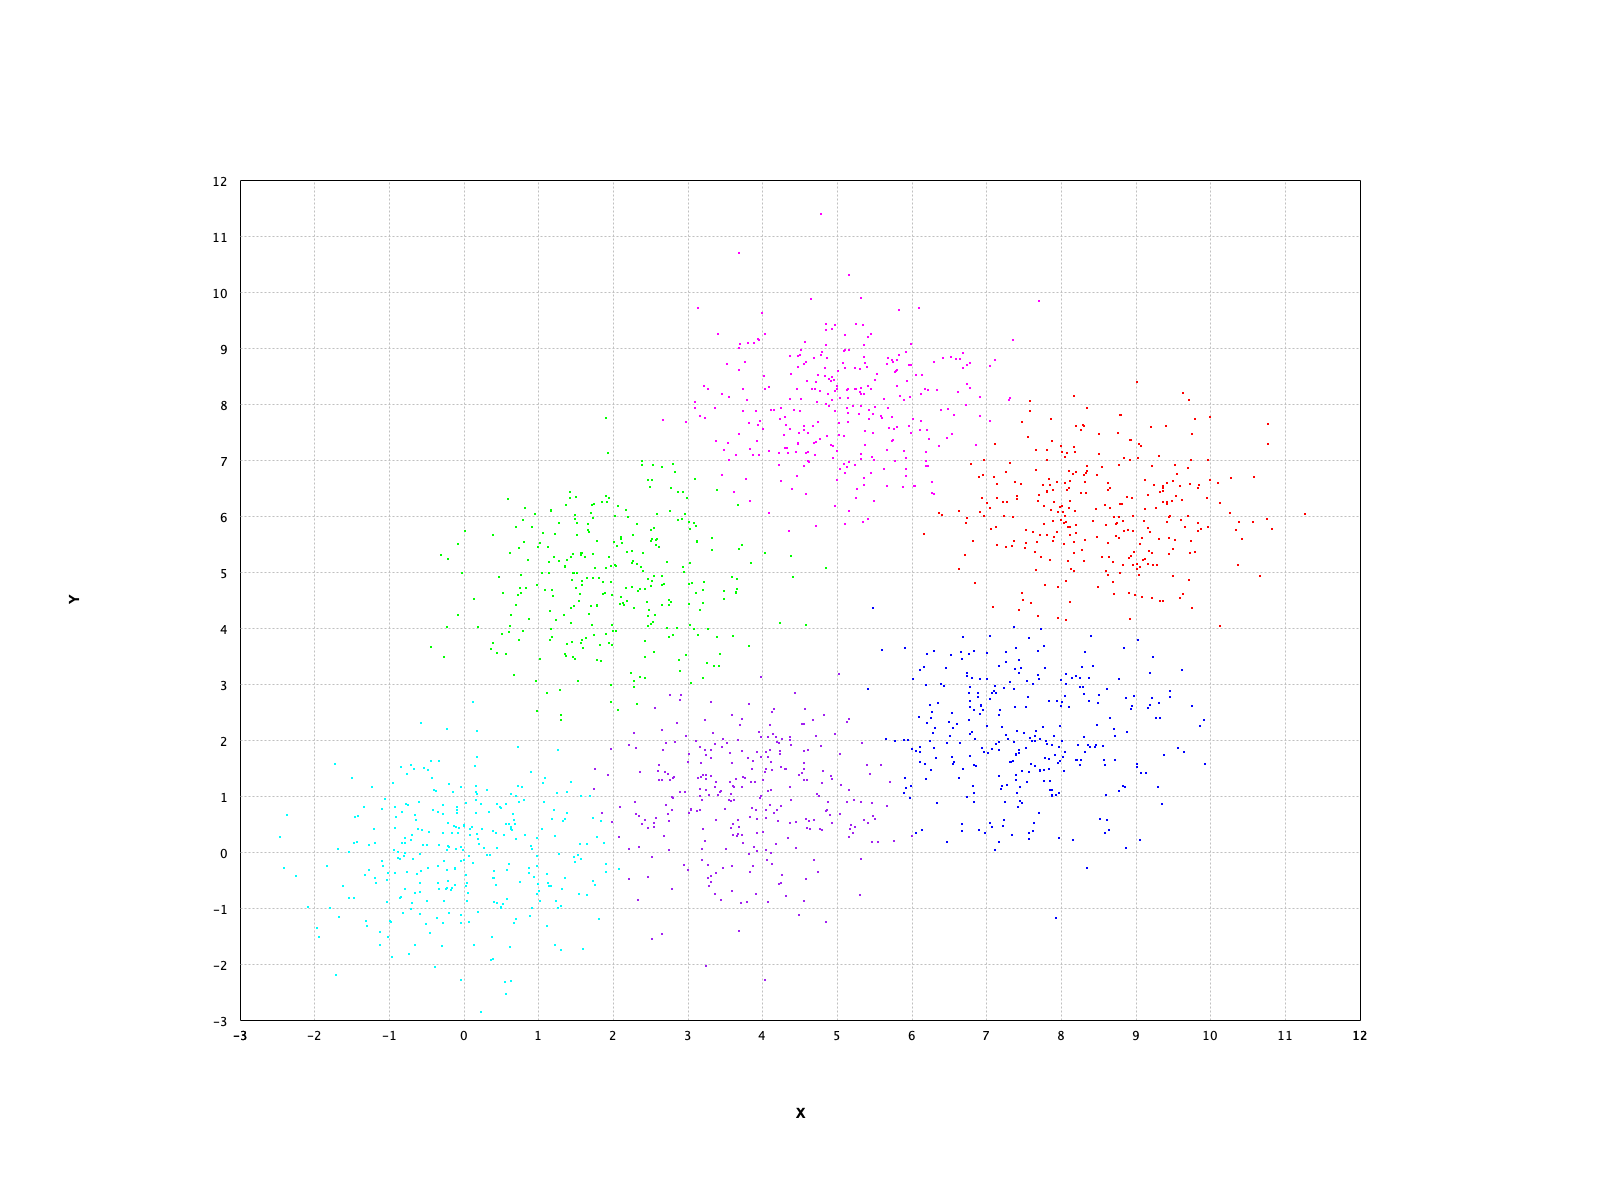

clusters: KMeans = Cluster distortion: 3247.64055
Cluster size of 1800 data points:
Cluster    1    296 (16.4%)
Cluster    2    302 (16.8%)
Cluster    3    302 (16.8%)
Cluster    4    302 (16.8%)
Cluster    5    302 (16.8%)
Cluster    6    296 (16.4%)


In [3]:
val clusters = kmeans(x, 6, runs = 20)
show(plot(x, clusters.y, '.', Palette.COLORS))

K-Means works very well on Gaussian mixtures. If the clusters are elongated, however, the results may be far from optimal.

[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after initialization: 50858.2699
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   1 iterations: 16880.0956
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   2 iterations: 15854.1215
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   3 iterations: 15415.0976
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   4 iterations: 15278.7605
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   5 iterations: 15225.5037
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   6 iterations: 15216.4521
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   7 iterations: 15214.3520
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   8 iterations: 15200.1948
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   9 iterations: 15196.2030
[scala-interpreter-1] INFO smi


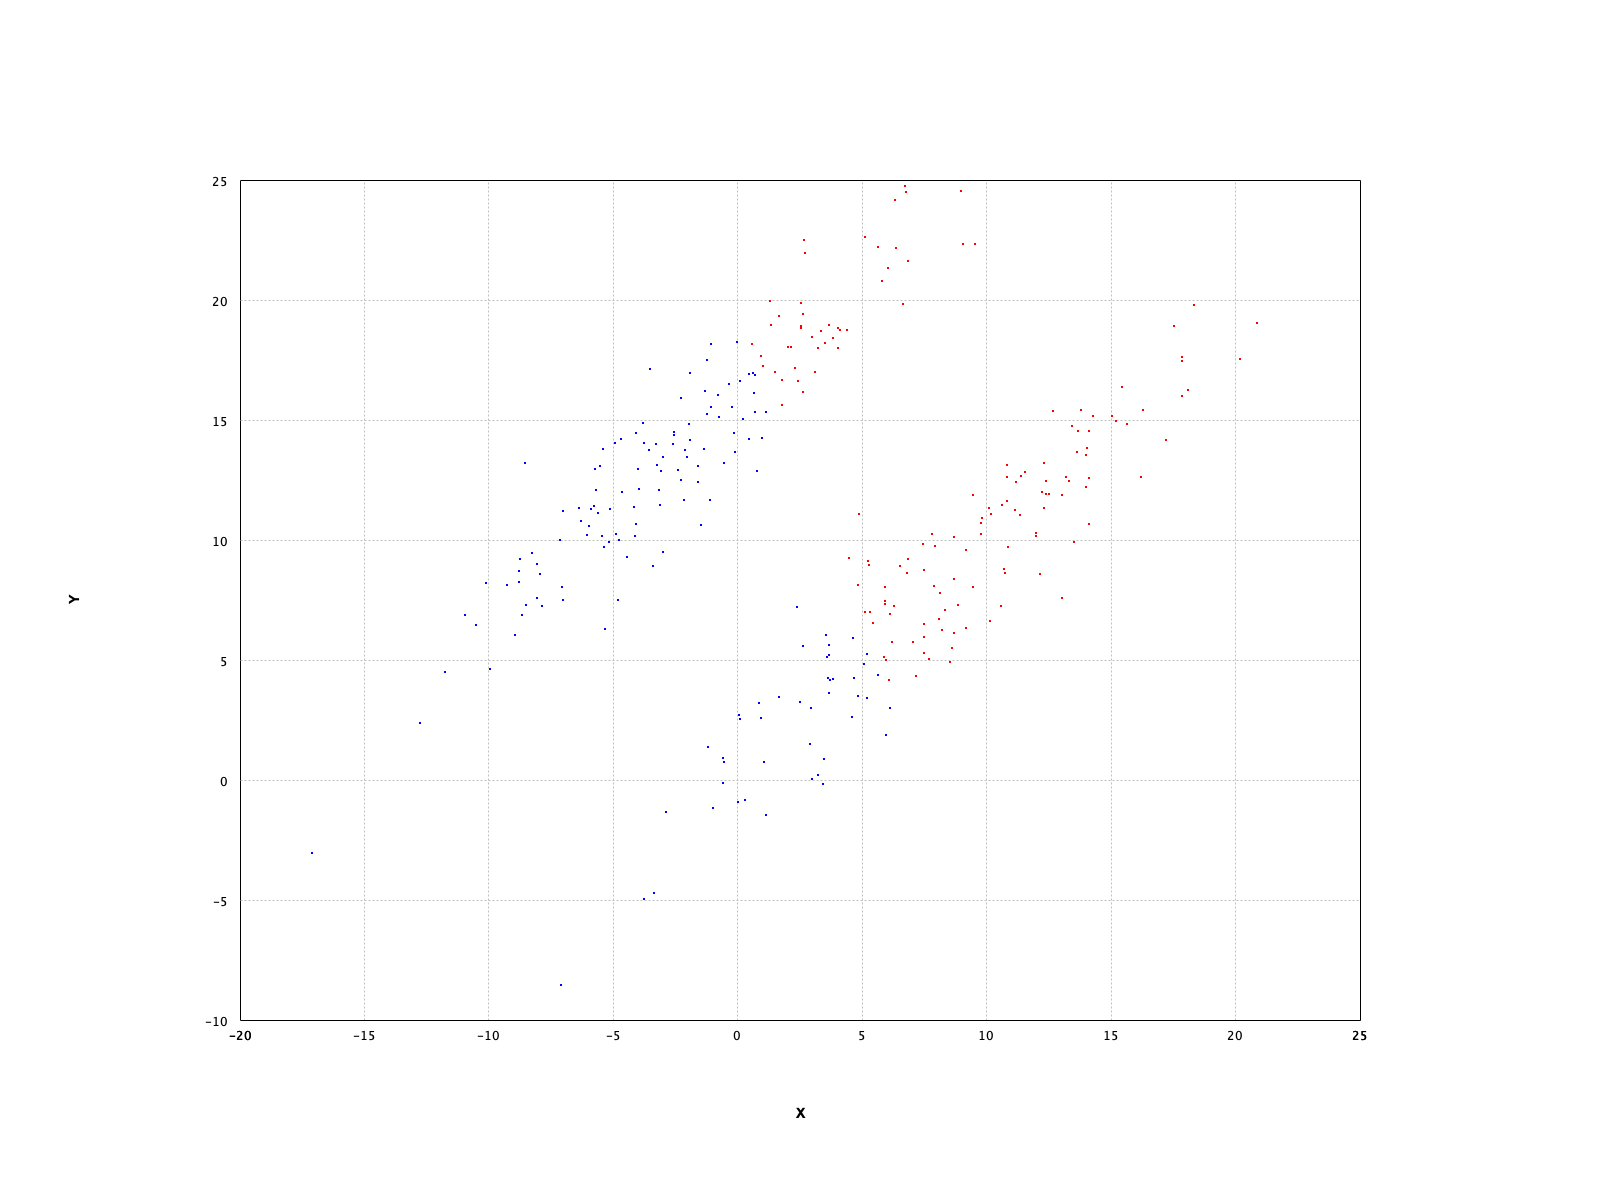

elongate: Array[Array[Double]] = Array(
  Array(10.8523, 9.7169),
  Array(14.2494, 15.1848),
  Array(2.904, 3.0127),
  Array(2.4903, 3.2661),
  Array(0.048094, 2.7137),
  Array(3.6621, 5.6656),
  Array(6.8047, 9.2418),
  Array(5.8684, 5.1483),
  Array(7.9225, 9.7672),
  Array(6.275, 7.2811),
  Array(1.0525, 0.76276),
  Array(4.8629, 11.0868),
  Array(13.9788, 13.5667),
  Array(4.8223, 8.1387),
  Array(6.508, 8.929),
  Array(17.8406, 17.4807),
  Array(5.8909, 8.0467),
  Array(4.8268, 3.5388),
  Array(8.1999, 6.2595),
  Array(10.7932, 11.6323),
  Array(8.6697, 10.1405),
  Array(5.6048, 4.3761),
  Array(-0.61802, 0.93471),
  Array(1.6231, 3.4806),
  Array(10.0924, 11.3367),
  Array(10.5453, 7.283),
  Array(5.8831, 7.3687),
  Array(8.8207, 7.3324),
  Array(5.1831, 5.2731),
  Array(7.68, 5.0488),
  Array(3.6551, 3.6418),
  Array(12.9918, 7.6132),
  Array(6.7901, 8.6489),
  Array(20.1396, 17.5614),
  Array(15.163, 14.9984),
  Array(7.4738, 8.7858),
  Array(11.5139, 12.8497),
  Array(11.9484,

In [4]:
val elongate = read.csv("data/clustering/gaussian/elongate.txt", header = false, delimiter = '\t').toArray
val clusters = kmeans(elongate, 2, runs = 20)
show(plot(elongate, clusters.y, '.', Palette.COLORS))

In K-Means, the number of clusters K has to be supplied by the user. However, the appropriate number of clusters is often unknown in practice. Several approaches (e.g. X-Means, G-Means, deterministic annealing, etc.) have been proposed to handle this challenge.

## X-Means

X-Means clustering algorithm is an extended K-Means which tries to automatically determine the number of clusters based on BIC scores. Starting with only one cluster, the X-Means algorithm goes into action after each run of K-Means, making local decisions about which subset of the current centroids should split themselves in order to better fit the data. The splitting decision is done by computing the Bayesian Information Criterion (BIC).

[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after initialization: 31051.9833
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   1 iterations: 19102.8560
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   2 iterations: 17712.1834
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   3 iterations: 17011.1657
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   4 iterations: 16675.3952
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   5 iterations: 16549.5464
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   6 iterations: 16516.0904
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   7 iterations: 16514.9754
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   8 iterations: 16514.9754
[scala-interpreter-1] INFO smile.clustering.XMeans - Cluster   0 BIC:   -7848.0276, BIC after split:   -7812.5462, improvement:


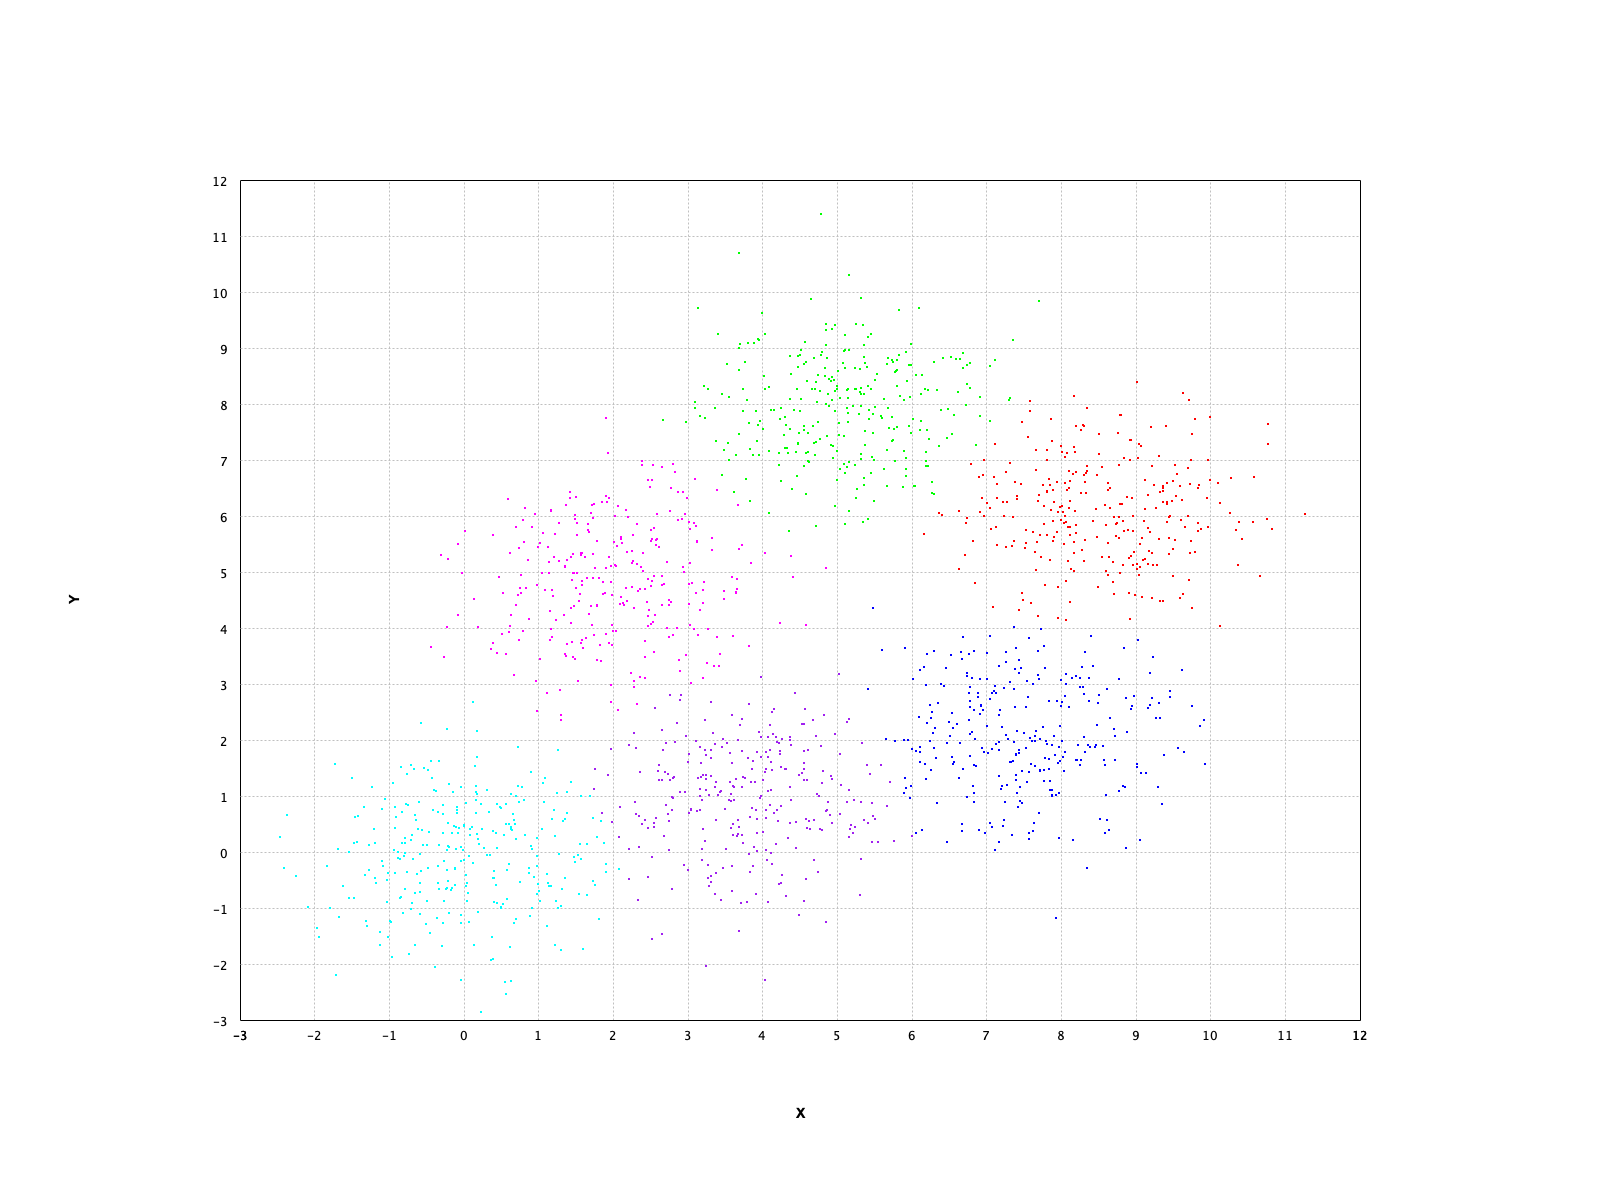

clusters: XMeans = Cluster distortion: 3247.64055
Cluster size of 1800 data points:
Cluster    1    296 (16.4%)
Cluster    2    302 (16.8%)
Cluster    3    302 (16.8%)
Cluster    4    302 (16.8%)
Cluster    5    302 (16.8%)
Cluster    6    296 (16.4%)


In [5]:
val clusters = xmeans(x, 50)
show(plot(x, clusters.y, '.', Palette.COLORS))

## G-Means

G-Means clustering algorithm is another extended K-Means which tries to automatically determine the number of clusters by normality test. The G-Means algorithm is based on a statistical test for the hypothesis that a subset of data follows a Gaussian distribution. G-Means runs K-Means with increasing k in a hierarchical fashion until the test accepts the hypothesis that the data assigned to each K-Means center are Gaussian.

[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after initialization: 27146.6445
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   1 iterations: 18212.5745
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   2 iterations: 17495.4570
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   3 iterations: 16967.4823
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   4 iterations: 16641.9865
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   5 iterations: 16541.9592
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   6 iterations: 16517.1366
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   7 iterations: 16515.0411
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   8 iterations: 16514.9754
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   9 iterations: 16514.9754
[scala-interpreter-1] INFO smi


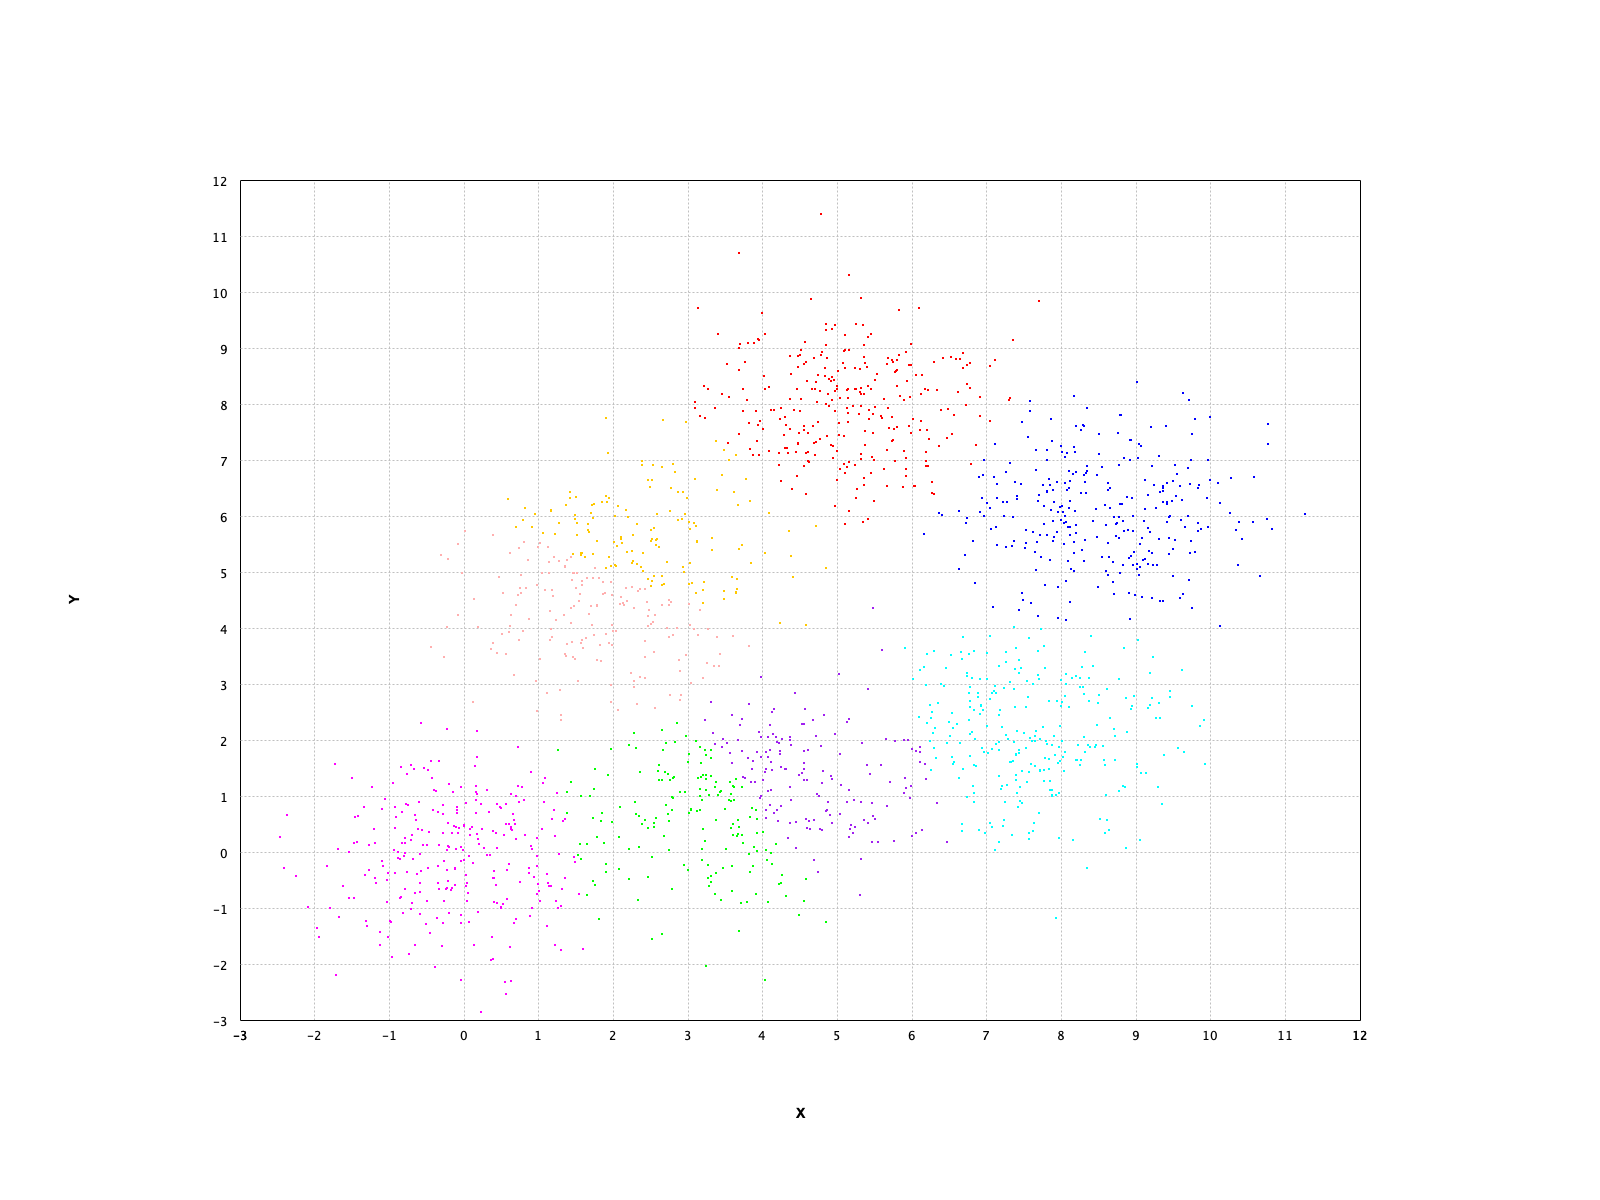

clusters: GMeans = Cluster distortion: 2800.22959
Cluster size of 1800 data points:
Cluster    1    290 (16.1%)
Cluster    2    295 (16.4%)
Cluster    3    175 ( 9.7%)
Cluster    4    280 (15.6%)
Cluster    5    279 (15.5%)
Cluster    6    161 ( 8.9%)
Cluster    7    147 ( 8.2%)
Cluster    8    173 ( 9.6%)


In [6]:
val clusters = gmeans(x, 50)
show(plot(x, clusters.y, '.', Palette.COLORS))

Neither X-Means nor G-Means works well on the elongate data. Both report only one cluster.

## Deterministic Annealing Clustering

The observation of annealing processes in physical chemistry motivated the use of similar concepts to avoid local minima of the optimization cost. Certain chemical systems can be driven to their low-energy states by annealing, which is a gradual reduction of temperature, spending a long time at the vicinity of the phase transition points. In the corresponding probabilistic framework, a Gibbs distribution is defined over the set of all possible configurations which assigns higher probability to configurations of lower energy. This distribution is parameterized by the temperature, and as the temperature is lowered it becomes more discriminating (concentrating most of the probability in a smaller subset of low-energy configurations). At the limit of low temperature it assigns nonzero probability only to global minimum configurations.

A known technique for nonconvex optimization that capitalizes on this physical analogy is simulated annealing based on the Metropolis algorithm. A sequence of random moves is generated and the random decision to accept a move depends on the cost of the resulting configuration relative to that of the current state. However, one must be very careful with the annealing schedule, i.e., the rate at which the temperature is lowered. In theory, the global minimum can be achieved if the schedule obeys `T ∝ 1 / log n`, where `n` is the number of the current iteration. Such schedules are not realistic in many applications. It was shown that perturbations of infinite variance (e.g., the Cauchy distribution) provide better ability to escape from minima and allow, in principle, the use of faster schedules.

Deterministic annealing tries to enjoy the best of both worlds. On the one hand it is deterministic, meaning that we do not want to be wandering randomly on the energy surface while making incremental progress on the average, as is the case for simulated annealing. On the other hand, it is still an annealing method and aims at the global minimum, instead of getting greedily attracted to a nearby local minimum. One can view deterministic annealing as replacing stochastic simulations by the use of expectation. An effective energy function, which is parameterized by a (pseudo) temperature, is derived through expectation and is deterministically optimized at successively reduced temperatures.

Deterministic annealing clustering is based on principles of information theory and probability theory, and it consists of minimizing the clustering cost at prescribed levels of randomness. The method provides soft clustering solutions at different scales, where the scale is directly related to the temperature parameter. For each temperature value, the algorithm iterates between the calculation of all posteriori probabilities and the update of the centroids vectors, until convergence is reached. There are "phase transitions" in the design process, where phases correspond to the number of effective clusters in the solution, which grows via splits as the temperature is lowered. The annealing starts with a high temperature. Here, all centroids vectors converge to the center of the pattern distribution (independent of their initial positions). Below a critical temperature the vectors start to split. Further decreasing the temperature leads to more splittings until all centroids vectors are separate. The annealing can therefore avoid (if it is sufficiently slow) the convergence to local minima. If a limitation on the number of clusters is imposed, then at zero temperature a hard clustering solution is obtained.

[scala-interpreter-1] INFO smile.math.matrix.Factory - smile-netlib module is available.
Mar 11, 2020 8:05:50 PM com.github.fommil.jni.JniLoader liberalLoad
INFO: successfully loaded /var/folders/cb/577dvd4n2db0ghdn3gn7ss0h0000gn/T/jniloader7705193446735003938netlib-native_system-osx-x86_64.jnilib
[scala-interpreter-1] INFO smile.math.matrix.PowerIteration - Largest eigenvalue after  10 power iterations: 13.2967
[scala-interpreter-1] INFO smile.clustering.DeterministicAnnealing - Entropy after   1 iterations at temperature 26.6033 and k = 1: 1247.6089 (soft distortion = 33863.5605)
[scala-interpreter-1] INFO smile.clustering.DeterministicAnnealing - Entropy after   2 iterations at temperature 26.6033 and k = 1: 1247.6091 (soft distortion = 33862.0667)
[scala-interpreter-1] INFO smile.clustering.DeterministicAnnealing - Entropy after   3 iterations at temperature 26.6033 and k = 1: 1247.6092 (soft distortion = 33862.0695)
[scala-interpreter-1] INFO smile.clustering.DeterministicAnnealin


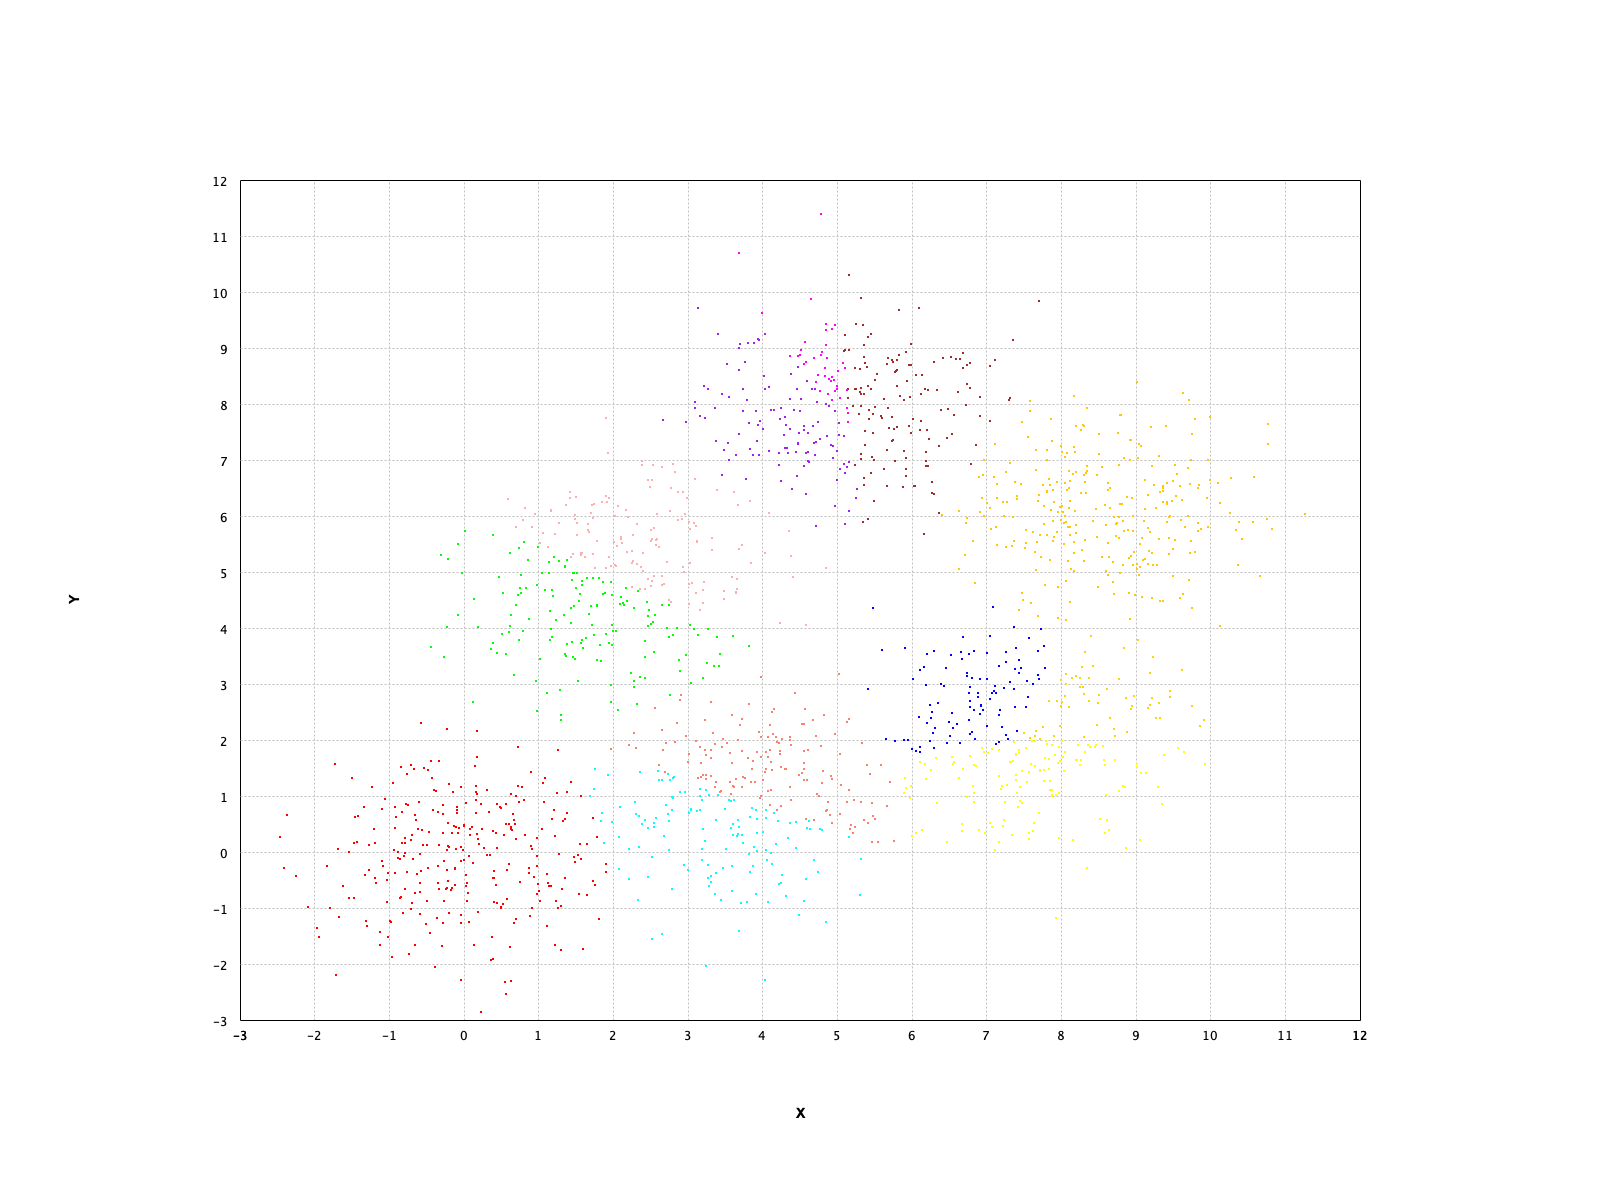

clusters: DeterministicAnnealing = Cluster distortion: 2862.52100
Cluster size of 1800 data points:
Cluster    1    297 (16.5%)
Cluster    2    105 ( 5.8%)
Cluster    3    159 ( 8.8%)
Cluster    4     42 ( 2.3%)
Cluster    5    139 ( 7.7%)
Cluster    6    116 ( 6.4%)
Cluster    7    292 (16.2%)
Cluster    8    149 ( 8.3%)
Cluster    9    140 ( 7.8%)
Cluster   10     59 ( 3.3%)
Cluster   11    143 ( 7.9%)
Cluster   12    159 ( 8.8%)


In [7]:
val clusters = dac(x, 12, 0.9)
show(plot(x, clusters.y, '.', Palette.COLORS))

## Sequential Information Bottleneck

The Sequential Information Bottleneck (SIB) algorithm clusters co-occurrence data such as text documents vs words. SIB is guaranteed to converge to a local maximum of the information. Moreover, the time and space complexity are significantly improved in contrast to the agglomerative IB algorithm.

In analogy to K-Means, SIB's update formulas are essentially same as the EM algorithm for estimating finite Gaussian mixture model by replacing regular Euclidean distance with Kullback-Leibler divergence, which is clearly a better dissimilarity measure for co-occurrence data. However, the common batch updating rule (assigning all instances to nearest centroids and then updating centroids) of K-Means won't work in SIB, which has to work in a sequential way (reassigning (if better) each instance then immediately update related centroids). It might be because K-L divergence is very sensitive and the centroids may be significantly changed in each iteration in batch updating rule.

Note that this implementation has a little difference from the original paper, in which a weighted Jensen-Shannon divergence is employed as a criterion to assign a randomly-picked sample to a different cluster. However, this doesn't work well in some cases as we experienced probably because the weighted JS divergence gives too much weight to clusters which is much larger than a single sample. In this implementation, we instead use the regular/unweighted Jensen-Shannon divergence.

In [ ]:
val data = read.libsvm("data/libsvm/news20.dat")
val sparse = (0 until data.size).map(i => data(i).x).toArray
val clusters = sib(sparse, 20, 100, 8)

The news data in data/libsvm/news20.dat is a very sparse data of dimension 62061. The data contains 15935 samples. 

## CLARANS

The K-Medoids algorithm is an adaptation of the k-means algorithm. Rather than calculate the mean of the items in each cluster, a representative item, or medoid, is chosen for each cluster at each iteration. The K-Medoids algorithm attempts to minimize the distance between points labeled to be in a cluster and the medoid of that cluster. So a medoid is a most centrally located point in the cluster. K-Medoids works with an arbitrary matrix of distances between data points instead of L2. It is also more robust to noise and outliers as compared to K-Means.

The most common realisation of K-Medoids clustering is the Partitioning Around Medoids (PAM) algorithm. PAM uses a greedy search which may not find the optimum solution, but it is faster than exhaustive search.

CLARANS (Clustering Large Applications based upon RANdomized Search) is a more efficient medoid-based clustering algorithm. In CLARANS, the process of finding k medoids from n objects is viewed abstractly as searching through a certain graph. In the graph, a node is represented by a set of k objects as selected medoids. Two nodes are neighbors if their sets differ by only one object. In each iteration, CLARANS considers a set of randomly chosen neighbor nodes as candidate of new medoids. We will move to the neighbor node if the neighbor is a better choice for medoids. Otherwise, a local optima is discovered. The entire process is repeated multiple time to find better.
```
def clarans[T](data: Array[T], distance: Distance[T], k: Int, maxNeighbor: Int, numLocal: Int): CLARANS[T]
```
The parameter `maxNeighbor` specifies the maximum number of neighbors examined. The higher the value of `maxNeighbor`, the closer is CLARANS to PAM, and the longer is each search of a local minima. But the quality of such a local minima is higher and fewer local minima needs to be obtained.

[scala-interpreter-1] INFO smile.math.MathEx - Set RNG seed 19650218 for thread scala-interpreter-1
[scala-interpreter-1] INFO smile.clustering.CLARANS - Distortion reduces to 3437.0378 after   3 random neighbors
[scala-interpreter-1] INFO smile.clustering.CLARANS - Distortion reduces to 2834.3658 after  12 random neighbors
[scala-interpreter-1] INFO smile.clustering.CLARANS - Distortion reduces to 2732.8196 after  37 random neighbors
[scala-interpreter-1] INFO smile.clustering.CLARANS - Distortion reduces to 2605.3919 after  17 random neighbors
[scala-interpreter-1] INFO smile.clustering.CLARANS - Distortion reduces to 2599.1140 after  23 random neighbors
[scala-interpreter-1] INFO smile.clustering.CLARANS - Distortion reduces to 2506.2610 after  57 random neighbors
[scala-interpreter-1] INFO smile.clustering.CLARANS - Distortion reduces to 2409.6296 after   4 random neighbors
[scala-interpreter-1] INFO smile.clustering.CLARANS - Distortion reduces to 2393.3899 after  39 random neighb


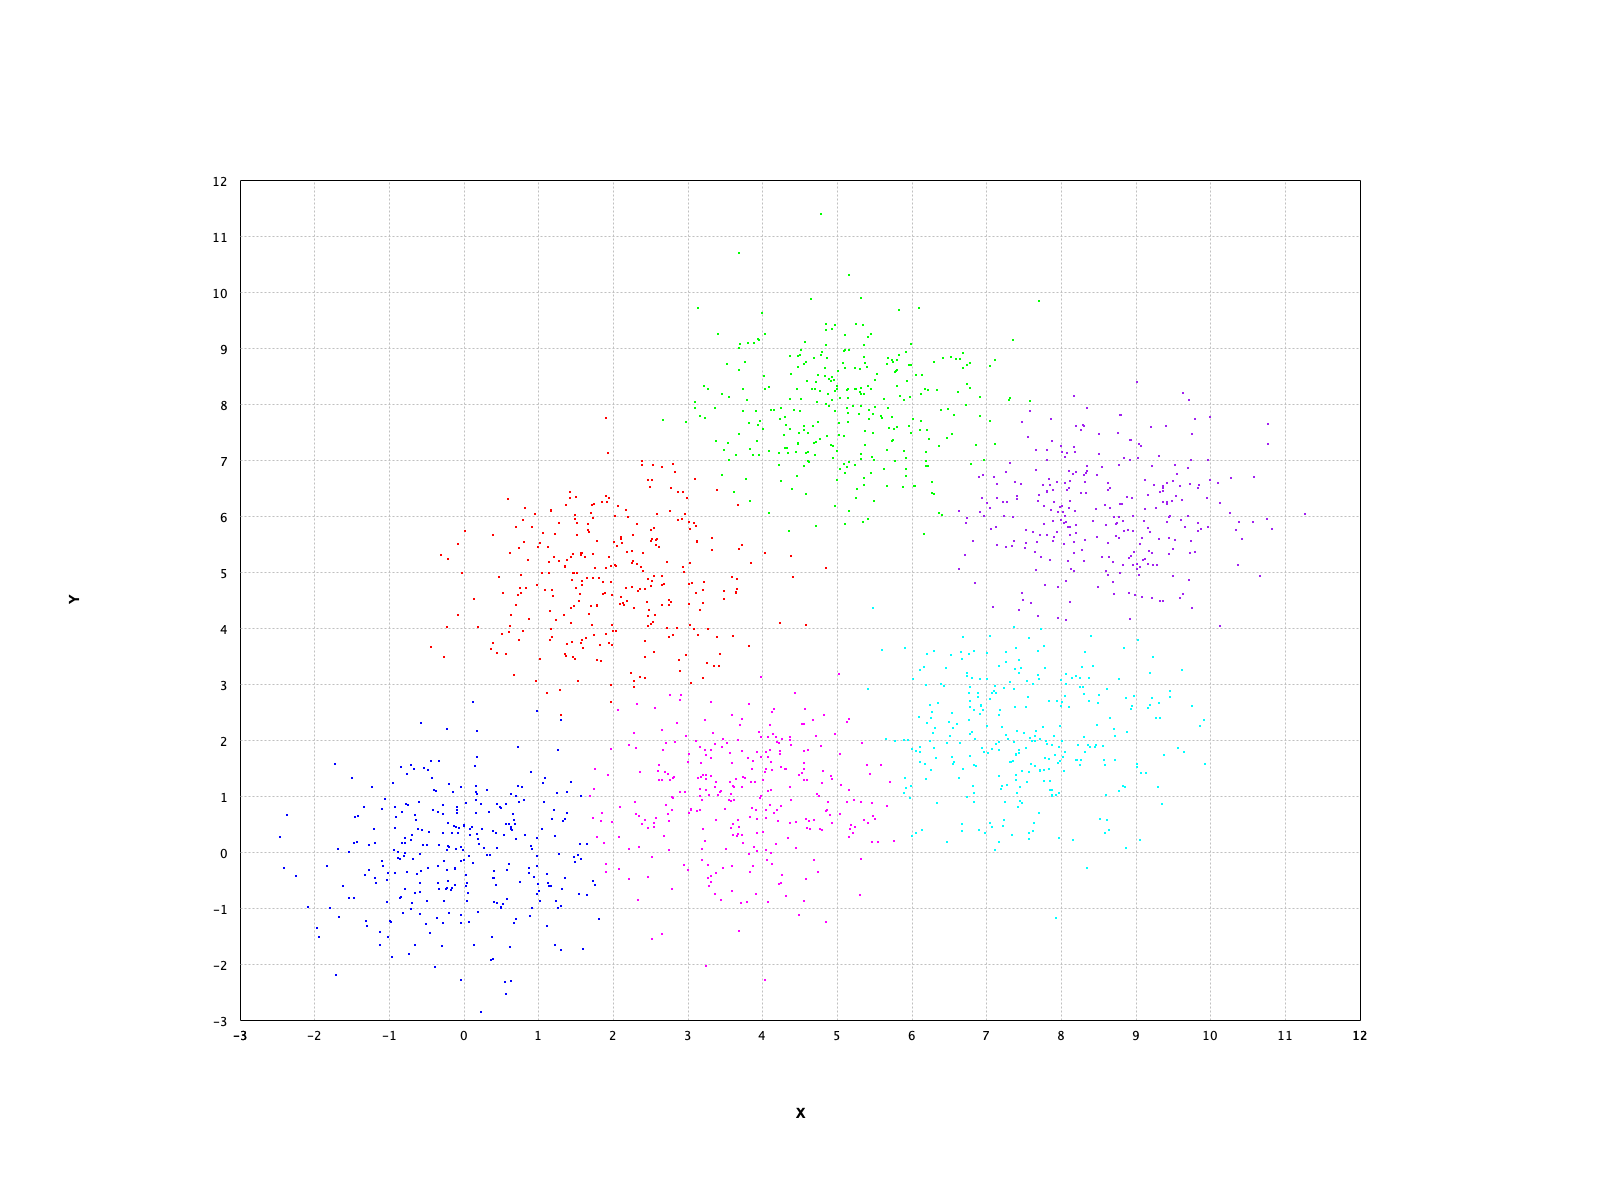

clusters: CLARANS[Array[Double]] = Cluster distortion: 2213.49130
Cluster size of 1800 data points:
Cluster    1    298 (16.6%)
Cluster    2    296 (16.4%)
Cluster    3    309 (17.2%)
Cluster    4    305 (16.9%)
Cluster    5    303 (16.8%)
Cluster    6    289 (16.1%)


In [3]:
val clusters = clarans(x, new EuclideanDistance(), 6, 10, 20)
show(plot(x, clusters.y, '.', Palette.COLORS))

## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) finds a number of clusters starting from the estimated density distribution of corresponding nodes.
```
    // DBSCAN with a customized data structure for neighborhood search
    def dbscan[T](data: Array[T], nns: RNNSearch[T, T], minPts: Int, radius: Double): DBSCAN[T]

    def dbscan[T](data: Array[T], distance: Metric[T], minPts: Int, radius: Double): DBSCAN[T]

    // DBSCAN with Euclidean distance
    def dbscan(data: Array[Array[Double]], minPts: Int, radius: Double): DBSCAN[Array[Double]]
``` 
DBSCAN requires two parameters: radius (i.e. neighborhood radius) and the number of minimum points required to form a cluster (minPts). It starts with an arbitrary starting point that has not been visited. This point's neighborhood is retrieved, and if it contains sufficient number of points, a cluster is started. Otherwise, the point is labeled as noise. Note that this point might later be found in a sufficiently sized radius-environment of a different point and hence be made part of a cluster.

If a point is found to be part of a cluster, its neighborhood is also part of that cluster. Hence, all points that are found within the neighborhood are added, as is their own neighborhood. This process continues until the cluster is completely found. Then, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster of noise.

DBSCAN visits each point of the database, possibly multiple times (e.g., as candidates to different clusters). For practical considerations, however, the time complexity is mostly governed by the number of nearest neighbor queries. DBSCAN executes exactly one such query for each point, and if an indexing structure is used that executes such a neighborhood query in `O(log n)`, an overall runtime complexity of `O(n log n)` is obtained.

[scala-interpreter-1] INFO smile.util.package$ - DBSCAN runtime: 0:00:00.799977
[scala-interpreter-1] INFO smile.util.package$ - DBSCAN runtime: 0:00:00.801463



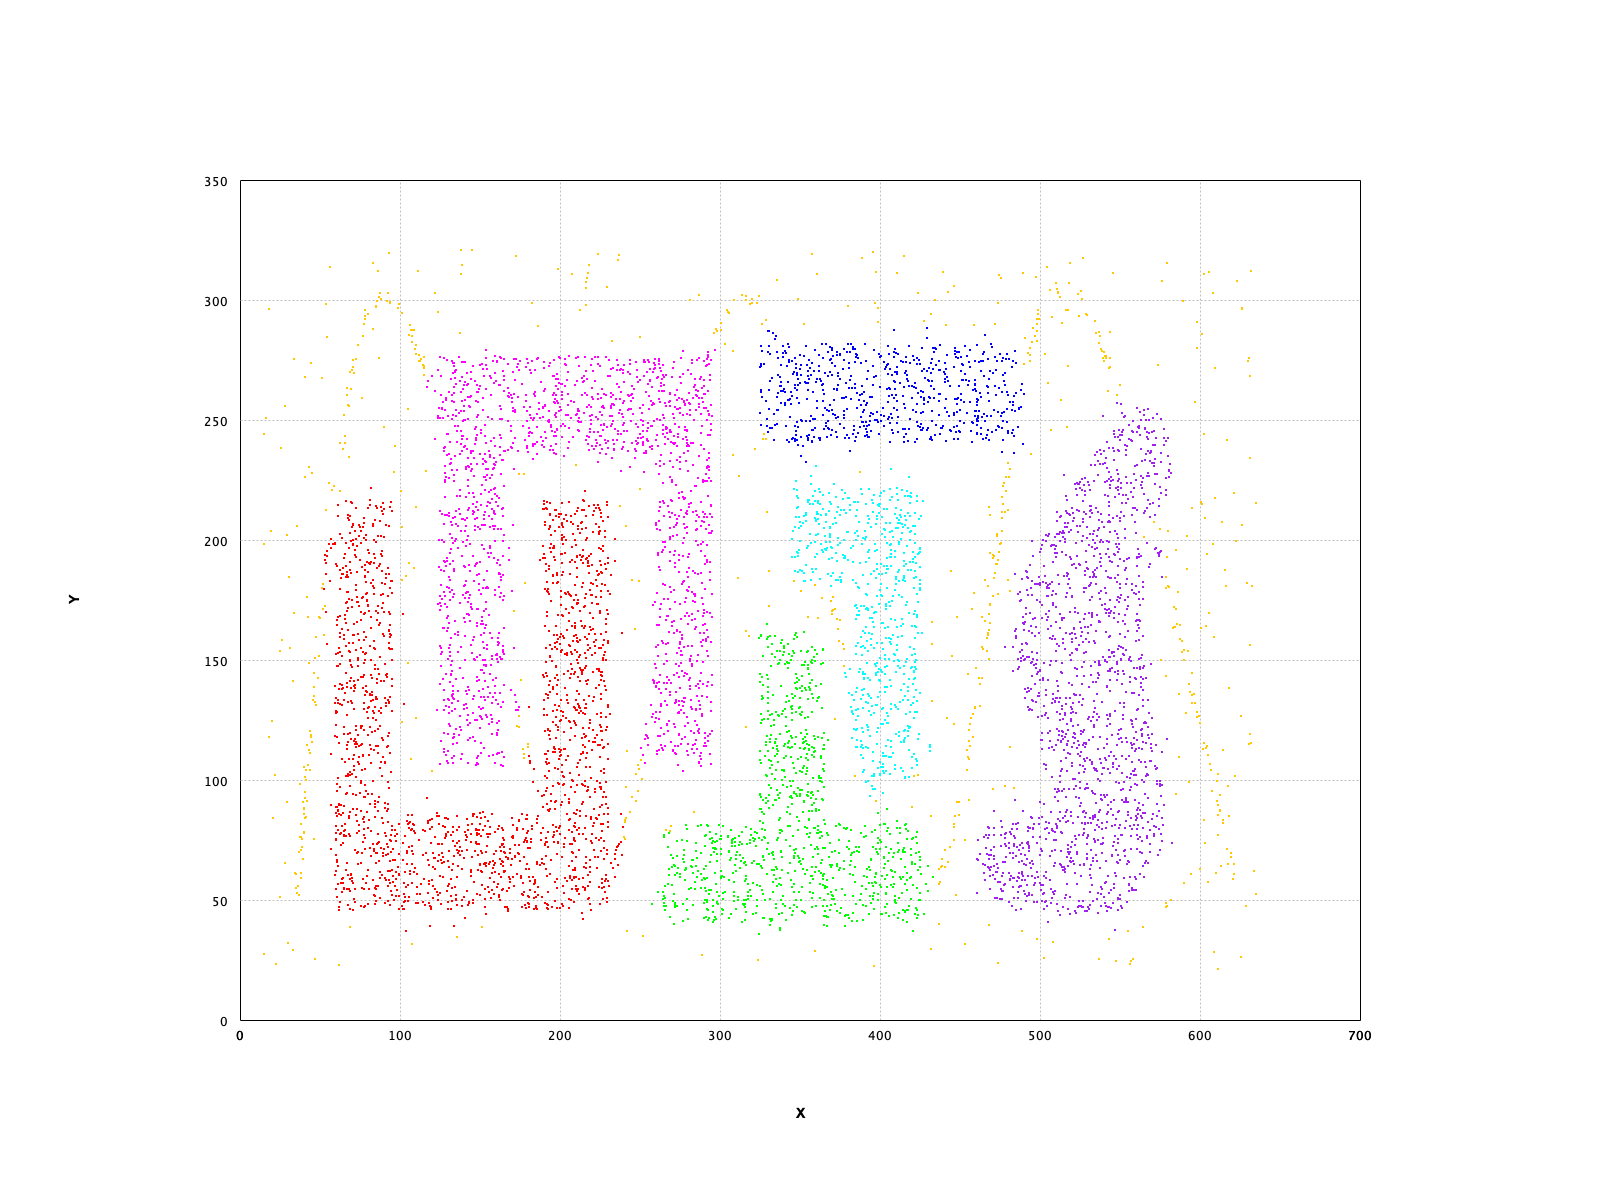

t48: Array[Array[Double]] = Array(
  Array(68.601997, 102.491997),
  Array(454.665985, 264.80899),
  Array(101.283997, 169.285995),
  Array(372.61499, 263.140991),
  Array(300.989014, 46.555),
  Array(100.904999, 205.776993),
  Array(110.170998, 55.647999),
  Array(118.856003, 47.445999),
  Array(355.247009, 76.431),
  Array(276.085999, 182.048004),
  Array(143.376007, 117.737999),
  Array(204.207001, 133.410004),
  Array(78.260002, 139.326996),
  Array(158.722, 211.529999),
  Array(68.433998, 59.125),
  Array(407.505005, 160.498001),
  Array(416.434998, 150.445999),
  Array(507.549011, 190.889008),
  Array(149.841003, 204.709),
  Array(498.759003, 181.947998),
  Array(274.61499, 232.733994),
  Array(84.023003, 90.084),
  Array(362.240997, 242.054993),
  Array(505.821014, 159.210007),
  Array(420.803986, 134.830002),
  Array(504.035004, 314.125),
  Array(356.670013, 199.093994),
  Array(326.54599, 91.766998),
  Array(214.477005, 63.821999),
  Array(351.351013, 86.885002),
  Array(216.0

In [4]:
val t48 = read.csv("data/clustering/chameleon/t4.8k.txt", header = false, delimiter = ' ').toArray
val clusters = dbscan(t48, 20, 10)
show(plot(t48, clusters.y, '.', Palette.COLORS))

The chameleon is a set of complicated spatial data of arbitrary cluster shapes. With appropriate parameters, DBSCAN can discover the correct clusters and also identify outliers.

## DENCLUE

DENCLUE (DENsity CLUstering) employs a cluster model based on kernel density estimation. A cluster is defined by a local maximum of the estimated density function. Data points going to the same local maximum are put into the same cluster. DENCLUE works efficiently for high-dimensional data sets and allows arbitrary noise levels while still guaranteeing to find the clustering.
```
    def denclue(data: Array[Array[Double]], sigma: Double, m: Int): DENCLUE
``` 
The parameter sigma is the smooth parameter in the Gaussian kernel. The user can choose sigma such that number of density attractors is constant for a long interval of sigma. The parameter m is the number of selected samples used in the iteration. This number should be much smaller than the number of data points to speed up the algorithm. It should also be large enough to capture the sufficient information of underlying distribution.

Clearly, DENCLUE doesn't work on data with uniform distribution. In high dimensional space, the data always look like uniformly distributed because of the curse of dimensionality. Therefore, DENCLUDE doesn't work well on high-dimensional data in general.

[scala-interpreter-1] INFO smile.clustering.DENCLUE - Select 50 samples by k-means
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after initialization: 819.9640
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   1 iterations: 646.8838
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   2 iterations: 610.4992
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   3 iterations: 592.7766
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   4 iterations: 582.7516
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   5 iterations: 574.5305
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   6 iterations: 569.7728
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   7 iterations: 567.1491
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   8 iterations: 565.6115
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortio


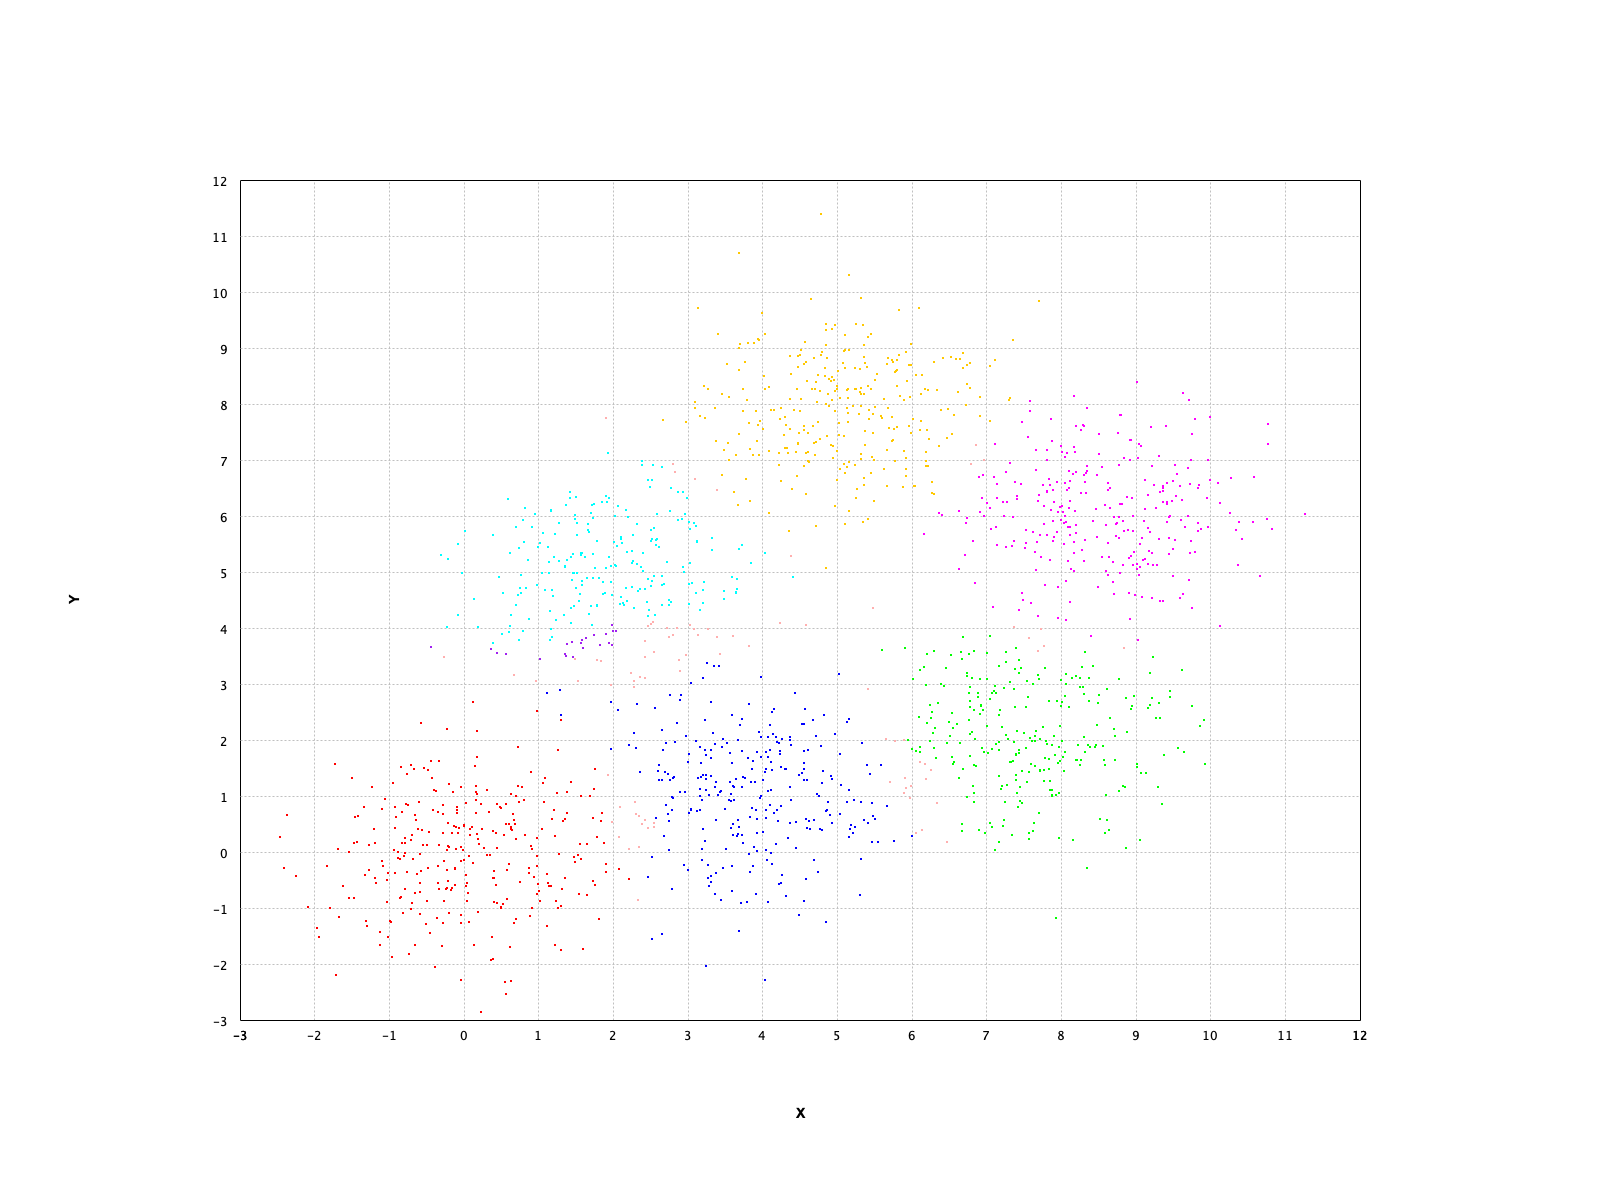

clusters: DENCLUE = Cluster size of 1800 data points:
Cluster    1    308 (17.1%)
Cluster    2    287 (15.9%)
Cluster    3    276 (15.3%)
Cluster    4    296 (16.4%)
Cluster    5    223 (12.4%)
Cluster    6     22 ( 1.2%)
Cluster    7    303 (16.8%)
Outliers         85 ( 4.7%)


In [5]:
val clusters = denclue(x, 1.0, 50)
show(plot(x, clusters.y, '.', Palette.COLORS))

## Spectral Clustering

Given a set of data points, the similarity matrix may be defined as a matrix S where Sij represents a measure of the similarity between points. Spectral clustering techniques make use of the spectrum of the similarity matrix of the data to perform dimensionality reduction for clustering in fewer dimensions. Then the clustering will be performed in the dimension-reduce space, in which clusters of non-convex shape may become tight. There are some intriguing similarities between spectral clustering methods and kernel PCA, which has been empirically observed to perform clustering.
```
    def specc(W: Array[Array[Double]], k: Int): SpectralClustering

    def specc(data: Array[Array[Double]], k: Int, sigma: Double): SpectralClustering

    // Nystrom approximation
    def specc(data: Array[Array[Double]], k: Int, l: Int, sigma: Double): SpectralClustering
```    
where W is the adjacency matrix of graph. The user may also provides the raw input data and the smooth/width parameter sigma of Gaussian kernel, which is a somewhat sensitive parameter. To search for the best setting, one may pick the value that gives the tightest clusters (smallest distortion, reported by the method distortion) in feature space. Spectral clustering is memory intensive because of the adjacency matrix. For large data, one may use Nystrom approximation by selecting some random samples. The parameter l specifies the number of random samples.

[scala-interpreter-1] INFO smile.math.matrix.Factory - smile-netlib module is available.
Mar 11, 2020 8:15:35 PM com.github.fommil.jni.JniLoader liberalLoad
INFO: successfully loaded /var/folders/cb/577dvd4n2db0ghdn3gn7ss0h0000gn/T/jniloader1757393649358220807netlib-native_system-osx-x86_64.jnilib
Mar 11, 2020 8:15:35 PM com.github.fommil.jni.JniLoader load
INFO: already loaded netlib-native_system-osx-x86_64.jnilib
[scala-interpreter-1] INFO smile.netlib.ARPACK - ARPACK: 125 iterations for Matrix of size 300
[scala-interpreter-1] INFO smile.netlib.ARPACK - ARPACK computed 2 eigenvalues
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after initialization: 0.7712
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   1 iterations: 0.4934
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   2 iterations: 0.4934
[scala-interpreter-1] INFO smile.util.package$ - Spectral clustering runtime: 0:00:00.90175



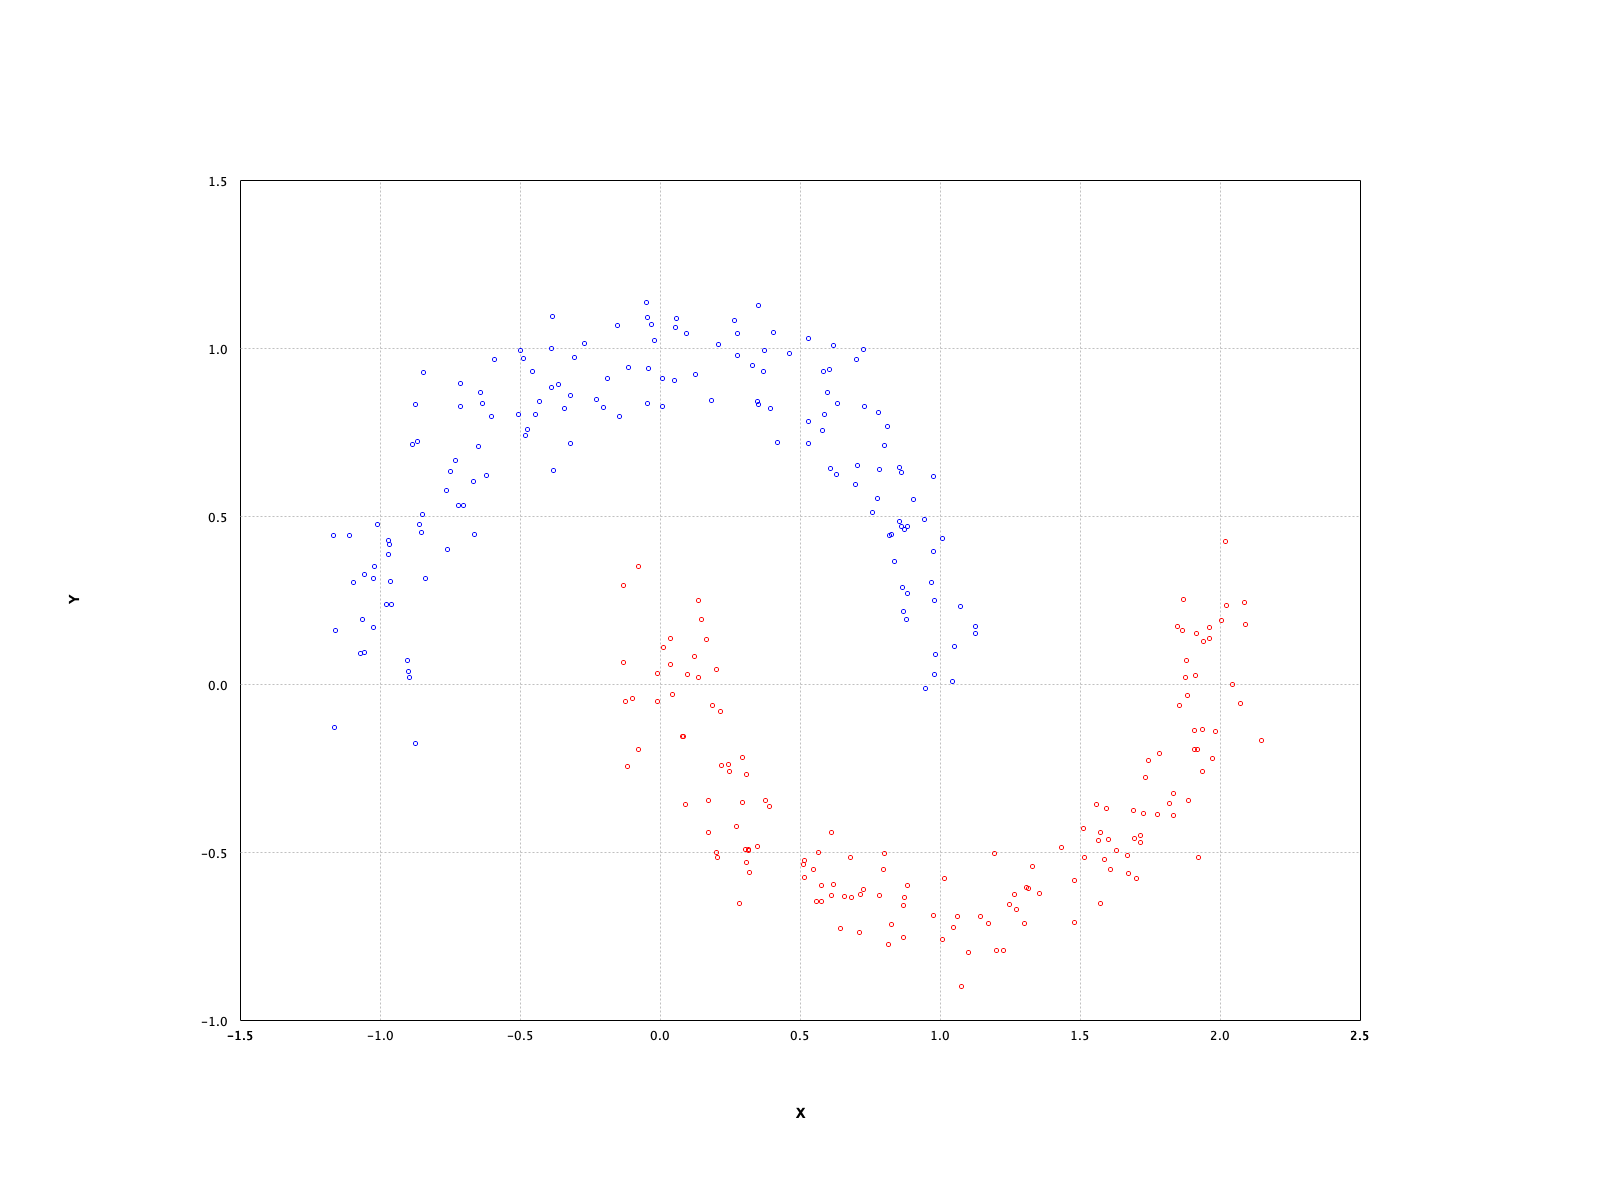

sincos: Array[Array[Double]] = Array(
  Array(1.0437, 0.0060246),
  Array(1.1265, 0.1721),
  Array(0.88145, 0.19282),
  Array(0.86615, 0.28748),
  Array(0.81867, 0.4423),
  Array(0.86305, 0.4683),
  Array(0.90529, 0.54763),
  Array(0.82647, 0.44575),
  Array(0.86122, 0.62806),
  Array(0.78458, 0.63809),
  Array(0.62867, 0.62294),
  Array(0.72847, 0.99574),
  Array(0.8, 0.70836),
  Array(0.60703, 0.93633),
  Array(0.58215, 0.93007),
  Array(0.72904, 0.82633),
  Array(0.46113, 0.9841),
  Array(0.34943, 0.84043),
  Array(0.35272, 0.83276),
  Array(0.37327, 0.99301),
  Array(0.27679, 1.0421),
  Array(0.12719, 0.92085),
  Array(-0.031501, 1.0698),
  Array(-0.046174, 1.0909),
  Array(0.05429, 1.0622),
  Array(-0.044508, 0.83491),
  Array(-0.15282, 1.0664),
  Array(-0.18585, 0.90787),
  Array(-0.30413, 0.97308),
  Array(-0.34173, 0.81949),
  Array(-0.45516, 0.92911),
  Array(-0.37973, 0.63589),
  Array(-0.48736, 0.96925),
  Array(-0.31882, 0.71542),
  Array(-0.44617, 0.80079),
  Array(-0.6348

In [6]:
val sincos = read.csv("data/clustering/nonconvex/sincos.txt", header = false, delimiter = '\t').toArray
val clusters = specc(sincos, 2, 0.2)
show(plot(sincos, clusters.y, 'o', Palette.COLORS))

## Minimum Entropy Clustering

In this algorithm, the clustering criterion is based on the conditional entropy `H(C | x)`, where C is the cluster label and x is an observation. According to Fano's inequality, we can estimate C with a low probability of error only if the conditional entropy `H(C | x)` is small. Minimum Entropy Clustering (MEC) also generalizes the criterion by replacing Shannon's entropy with Havrda-Charvat's structural α-entropy. Interestingly, the minimum entropy criterion based on structural `α`-entropy is equal to the probability error of the nearest neighbor method when `α = 2`. To estimate `p(C | x)`, MEC employs Parzen density estimation, a nonparametric approach.

This method performs very well especially when the exact number of clusters is unknown. The method can also correctly reveal the structure of data and effectively identify outliers simultaneously.
```
    def mec[T](data: Array[T], distance: Distance[T], k: Int, radius: Double): MEC[T]
    def mec[T](data: Array[T], distance: Metric[T], k: Int, radius: Double): MEC[T]
    def mec[T](data: Array[T], nns: RNNSearch[T, T], k: Int, radius: Double, y: Array[Int]): MEC[T]
    def mec(data: Array[Array[Double]], k: Int, radius: Double): MEC[Array[Double]]
``` 
MEC is an iterative algorithm starting with an initial partition given by any other clustering methods, e.g. K-Means, CLARNAS, hierarchical clustering, etc. Note that a random initialization is NOT appropriate.

[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after initialization: 2132.2764
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   1 iterations: 1464.2491
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   2 iterations: 1380.2612
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   3 iterations: 1332.7427
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   4 iterations: 1310.9282
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   5 iterations: 1301.6622
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   6 iterations: 1294.8513
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   7 iterations: 1286.0642
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   8 iterations: 1278.9242
[scala-interpreter-1] INFO smile.clustering.KMeans - Distortion after   9 iterations: 1276.3383
[scala-interpreter-1] INFO smile.cluster


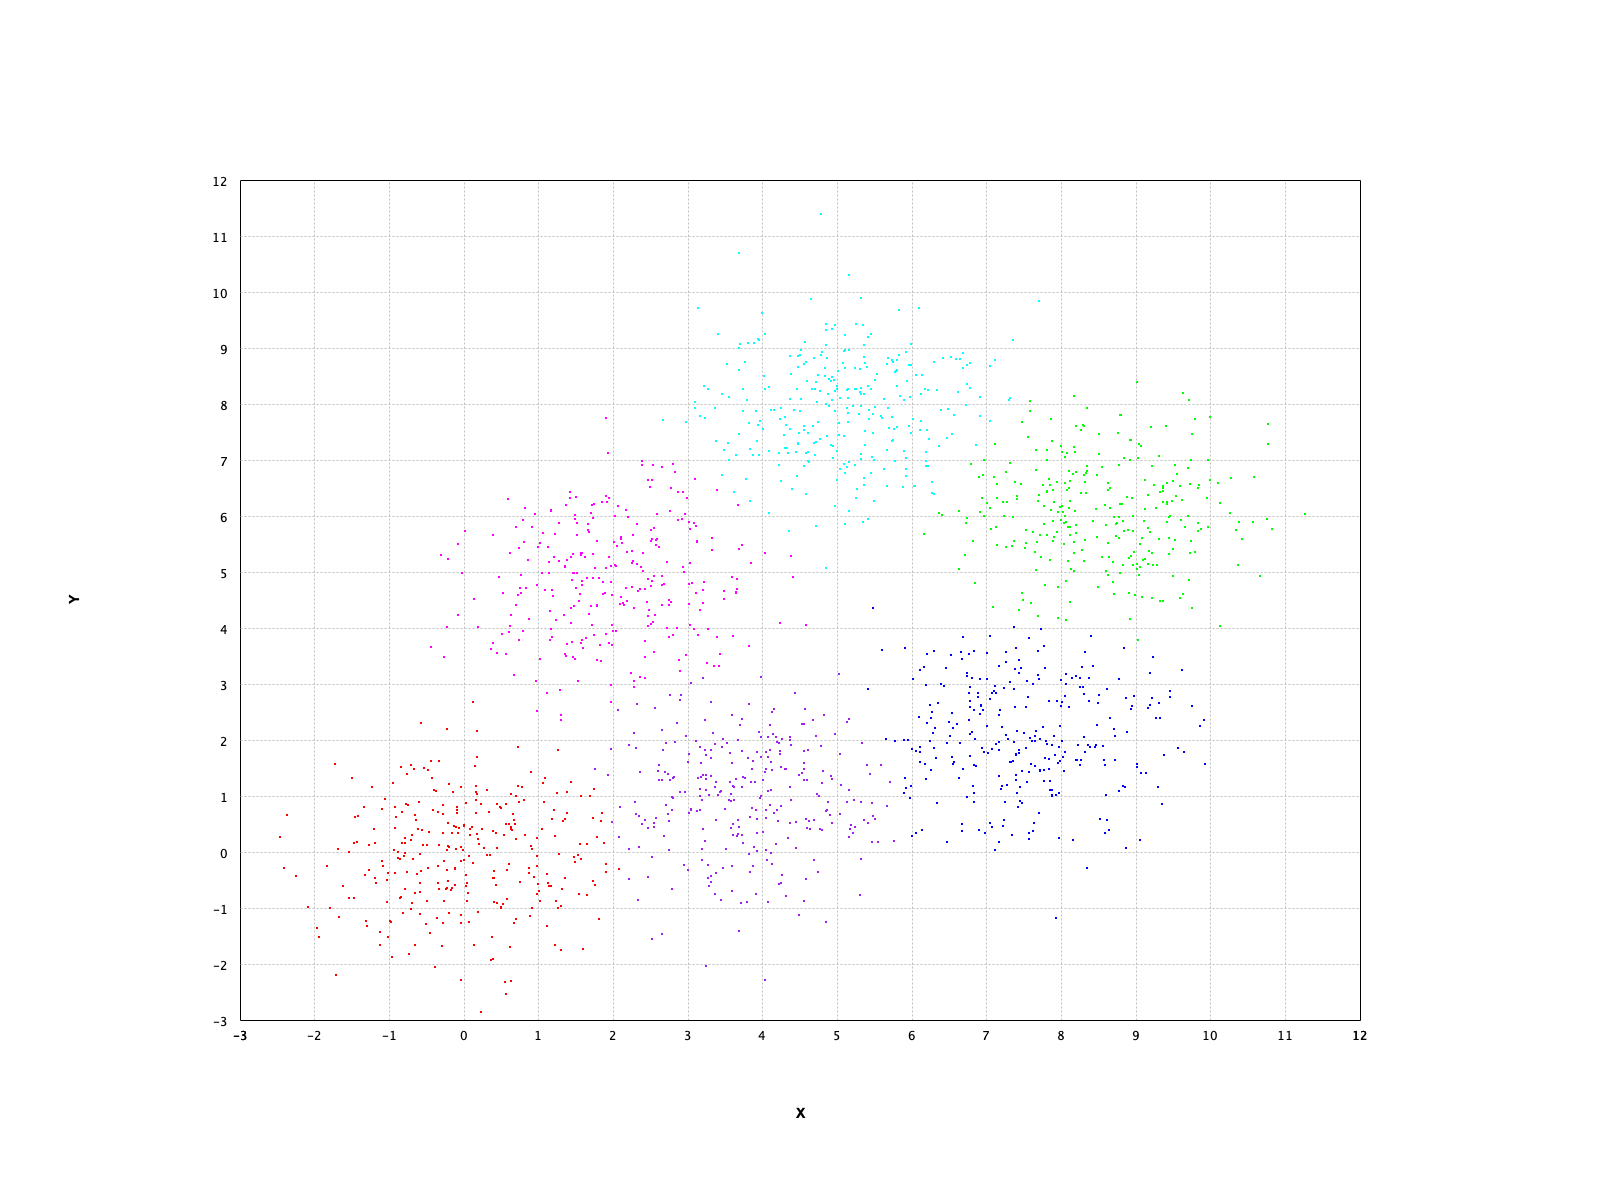

clusters: MEC[Array[Double]] = Cluster entropy: 80.52748
Cluster size of 1800 data points:
Cluster    1    304 (16.9%)
Cluster    2    302 (16.8%)
Cluster    3    297 (16.5%)
Cluster    4    297 (16.5%)
Cluster    5    303 (16.8%)
Cluster    6    297 (16.5%)


In [7]:
val clusters = mec(x, 20, 2.0)
show(plot(x, clusters.y, '.', Palette.COLORS))

Note that we use `k = 20` for this data and the algorithm still successfully finds the correct structure of data. In practice, we rarely know the right number of clusters in advance. With MEC, one may starts with a large k and the algorithm often can automatically remove unnecessary clusters and reach a lower entropy state.